In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
import sklearn.metrics as metrics

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_excel('Company_Data2015-1.xlsx')

#Glimpse of Data
data.head()

,Co_Code,Co_Name,Networth Next Year,Equity Paid Up,Networth,Capital Employed,Total Debt,Gross Block,Net Working Capital,Current Assets,...,PBIDTM (%)[Latest],PBITM (%)[Latest],PBDTM (%)[Latest],CPM (%)[Latest],APATM (%)[Latest],Debtors Velocity (Days),Creditors Velocity (Days),Inventory Velocity (Days),Value of Output/Total Assets,Value of Output/Gross Block
0,16974,Hind.Cables,-8021.60,419.36,-7027.48,-1007.24,5936.03,474.30,-1076.34,40.50,...,0.00,0.00,0.00,0.00,0.00,0,0,45.0,0.00,0.00
1,21214,Tata Tele. Mah.,-3986.19,1954.93,-2968.08,4458.20,7410.18,9070.86,-1098.88,486.86,...,-10.30,-39.74,-57.74,-57.74,-87.18,29,101,2.0,0.31,0.24
2,14852,ABG Shipyard,-3192.58,53.84,506.86,7714.68,6944.54,1281.54,4496.25,9097.64,...,-5279.14,-5516.98,-7780.25,-7723.67,-7961.51,97,558,0.0,-0.03,-0.26
3,2439,GTL,-3054.51,157.30,-623.49,2353.88,2326.05,1033.69,-2612.42,1034.12,...,-3.33,-7.21,-48.13,-47.70,-51.58,93,63,2.0,0.24,1.90
4,23505,Bharati Defence,-2967.36,50.30,-1070.83,4675.33,5740.90,1084.20,1836.23,4685.81,...,-295.55,-400.55,-845.88,379.79,274.79,3887,346,0.0,0.01,0.05


In [3]:
data.shape

(3586, 67)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3586 entries, 0 to 3585
Data columns (total 67 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Co_Code                              3586 non-null   int64  
 1   Co_Name                              3586 non-null   object 
 2   Networth Next Year                   3586 non-null   float64
 3   Equity Paid Up                       3586 non-null   float64
 4   Networth                             3586 non-null   float64
 5   Capital Employed                     3586 non-null   float64
 6   Total Debt                           3586 non-null   float64
 7   Gross Block                          3586 non-null   float64
 8   Net Working Capital                  3586 non-null   float64
 9   Current Assets                       3586 non-null   float64
 10  Current Liabilities and Provisions   3586 non-null   float64
 11  Total Assets/Liabilities      

In [5]:
data.duplicated().sum()

0

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Co_Code,3586.0,16065.388734,19776.817379,4.00,3029.2500,6077.500,24269.5000,72493.00
Networth Next Year,3586.0,725.045251,4769.681004,-8021.60,3.9850,19.015,123.8025,111729.10
Equity Paid Up,3586.0,62.966584,778.761744,0.00,3.7500,8.290,19.5175,42263.46
Networth,3586.0,649.746299,4091.988792,-7027.48,3.8925,18.580,117.2975,81657.35
Capital Employed,3586.0,2799.611054,26975.135385,-1824.75,7.6025,39.090,226.6050,714001.25
...,...,...,...,...,...,...,...,...
Debtors Velocity (Days),3586.0,603.894032,10636.759580,0.00,8.0000,49.000,106.0000,514721.00
Creditors Velocity (Days),3586.0,2057.854992,54169.479197,0.00,8.0000,39.000,89.0000,2034145.00
Inventory Velocity (Days),3483.0,79.644559,137.847792,-199.00,0.0000,35.000,96.0000,996.00
Value of Output/Total Assets,3586.0,0.819757,1.201400,-0.33,0.0700,0.480,1.1600,17.63


In [7]:
data.isnull().sum()

Co_Code                           0
Co_Name                           0
Networth Next Year                0
Equity Paid Up                    0
Networth                          0
                               ... 
Debtors Velocity (Days)           0
Creditors Velocity (Days)         0
Inventory Velocity (Days)       103
Value of Output/Total Assets      0
Value of Output/Gross Block       0
Length: 67, dtype: int64

In [8]:
data.columns = data.columns.str.strip().str.replace(' ', '_').str.replace('%','perc').str.replace('(', '').str.replace(')', '').str.replace('/','_by_').str.replace('&','and').str.replace('[', '_').str.replace(']', '').str.replace('.', '').str.replace('-', '_')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3586 entries, 0 to 3585
Data columns (total 67 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Co_Code                              3586 non-null   int64  
 1   Co_Name                              3586 non-null   object 
 2   Networth_Next_Year                   3586 non-null   float64
 3   Equity_Paid_Up                       3586 non-null   float64
 4   Networth                             3586 non-null   float64
 5   Capital_Employed                     3586 non-null   float64
 6   Total_Debt                           3586 non-null   float64
 7   Gross_Block                          3586 non-null   float64
 8   Net_Working_Capital                  3586 non-null   float64
 9   Current_Assets                       3586 non-null   float64
 10  Current_Liabilities_and_Provisions   3586 non-null   float64
 11  Total_Assets_by_Liabilities   

In [10]:
print(np.where(data.isnull().sum()>0))

(array([29, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 64], dtype=int64),)


In [11]:
data.iloc[:,64].isnull().sum()

103

#### Treating missing values

In [12]:
data.drop('Co_Name' , axis = 1, inplace = True)

In [13]:
col = list(data)

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')

data = pd.DataFrame(imputer.fit_transform(data))
data.columns=col
data.head()

,Co_Code,Networth_Next_Year,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block,Net_Working_Capital,Current_Assets,Current_Liabilities_and_Provisions,...,PBIDTM_perc_Latest,PBITM_perc_Latest,PBDTM_perc_Latest,CPM_perc_Latest,APATM_perc_Latest,Debtors_Velocity_Days,Creditors_Velocity_Days,Inventory_Velocity_Days,Value_of_Output_by_Total_Assets,Value_of_Output_by_Gross_Block
0,16974.0,-8021.60,419.36,-7027.48,-1007.24,5936.03,474.30,-1076.34,40.50,1116.85,...,0.00,0.00,0.00,0.00,0.00,0.0,0.0,45.0,0.00,0.00
1,21214.0,-3986.19,1954.93,-2968.08,4458.20,7410.18,9070.86,-1098.88,486.86,1585.74,...,-10.30,-39.74,-57.74,-57.74,-87.18,29.0,101.0,2.0,0.31,0.24
2,14852.0,-3192.58,53.84,506.86,7714.68,6944.54,1281.54,4496.25,9097.64,4601.39,...,-5279.14,-5516.98,-7780.25,-7723.67,-7961.51,97.0,558.0,0.0,-0.03,-0.26
3,2439.0,-3054.51,157.30,-623.49,2353.88,2326.05,1033.69,-2612.42,1034.12,3646.54,...,-3.33,-7.21,-48.13,-47.70,-51.58,93.0,63.0,2.0,0.24,1.90
4,23505.0,-2967.36,50.30,-1070.83,4675.33,5740.90,1084.20,1836.23,4685.81,2849.58,...,-295.55,-400.55,-845.88,379.79,274.79,3887.0,346.0,0.0,0.01,0.05


In [14]:
data.isnull().sum()

Co_Code                            0
Networth_Next_Year                 0
Equity_Paid_Up                     0
Networth                           0
Capital_Employed                   0
                                  ..
Debtors_Velocity_Days              0
Creditors_Velocity_Days            0
Inventory_Velocity_Days            0
Value_of_Output_by_Total_Assets    0
Value_of_Output_by_Gross_Block     0
Length: 66, dtype: int64

#### Checking outliers and treating outliers 

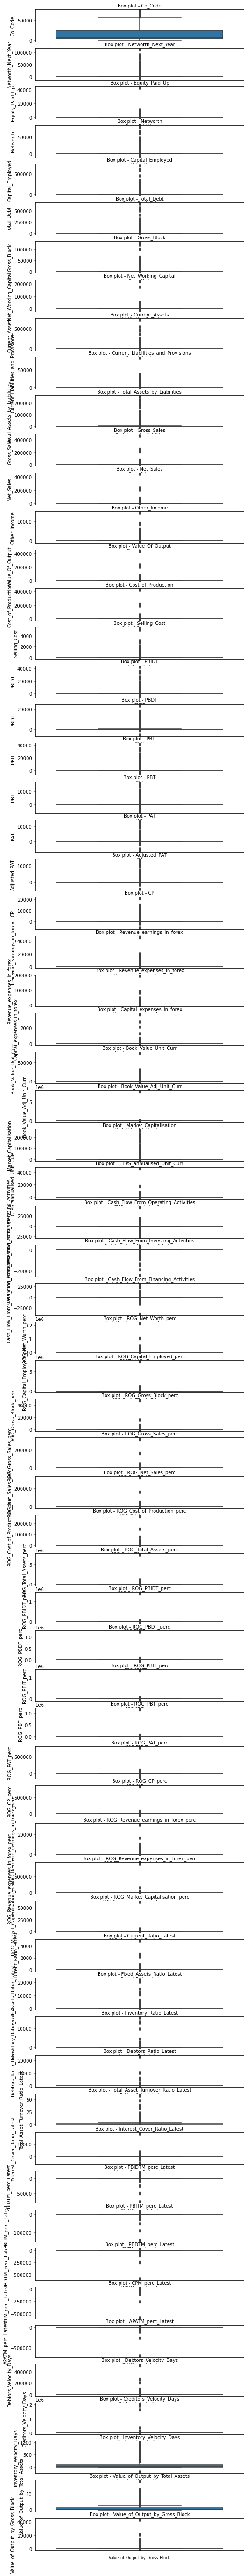

In [15]:
# Checking Outliers in dataset

col_names = list(data.columns)
fig, ax = plt.subplots(len(col_names), figsize=(8,100))

for i, col_val in enumerate(col_names):

    sns.boxplot(y=data[col_val], ax=ax[i])
    ax[i].set_title('Box plot - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

In [16]:
## There are outliers in the dataset, lets use capping method to treat them

In [17]:
def check_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([.25,.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [18]:
check_outlier(data['Networth_Next_Year'])

(-175.74125, 303.52875000000006)

In [19]:
check_outlier(data['Net_Working_Capital'])

(-89.40625, 151.52375)

In [20]:
check_outlier(data['ROG_PBIDT_perc'])

(-130.21875, 154.73125)

In [21]:
def treat_outlier(x):
    # taking 5,25,75 percentile of column
    q5= np.percentile(x,5)
    q25=np.percentile(x,25)
    q75=np.percentile(x,75)
    dt=np.percentile(x,95)
    #calculationg IQR range
    IQR=q75-q25
    #Calculating minimum threshold
    lower_bound=q25-(1.5*IQR)
    upper_bound=q75+(1.5*IQR)
    #Calculating maximum threshold
    print(q5,q25,q75,dt,min,max)
    #Capping outliers
    return x.apply(lambda y: dt if y > upper_bound else y).apply(lambda y: q5 if y < lower_bound else y)

In [22]:
for i in data:
    data[i]=treat_outlier(data[i])

463.75 3029.25 24269.5 67803.75 <built-in function min> <built-in function max>
-17.445 3.985 123.80250000000001 1978.8225000000002 <built-in function min> <built-in function max>
0.5 3.75 19.517500000000002 131.24 <built-in function min> <built-in function max>
-11.697499999999998 3.8925 117.2975 1829.0825 <built-in function min> <built-in function max>
0.4225 7.602499999999999 226.60500000000002 3634.915 <built-in function min> <built-in function max>
0.0 0.03 72.35000000000001 1572.61 <built-in function min> <built-in function max>
0.0 0.57 131.895 1409.325 <built-in function min> <built-in function max>
-11.944999999999999 0.9424999999999999 61.175 827.735 <built-in function min> <built-in function max>
0.14 4.0 135.2775 2014.74 <built-in function min> <built-in function max>
0.02 0.7324999999999999 65.65 1021.03 <built-in function min> <built-in function max>
1.22 10.555 310.54 4568.7300000000005 <built-in function min> <built-in function max>
0.0 1.4425000000000001 242.25 2845.37

In [23]:
data.shape

(3586, 66)

#### Transform Target variable into 0 and 1

In [24]:
data['default'] = np.where((data['Networth_Next_Year'] > 0), 0,1,)

In [25]:
data[['default','Networth_Next_Year']].head()

,default,Networth_Next_Year
0,1,-17.445
1,1,-17.445
2,1,-17.445
3,1,-17.445
4,1,-17.445


In [26]:
data.head()

,Co_Code,Networth_Next_Year,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block,Net_Working_Capital,Current_Assets,Current_Liabilities_and_Provisions,...,PBITM_perc_Latest,PBDTM_perc_Latest,CPM_perc_Latest,APATM_perc_Latest,Debtors_Velocity_Days,Creditors_Velocity_Days,Inventory_Velocity_Days,Value_of_Output_by_Total_Assets,Value_of_Output_by_Gross_Block,default
0,16974.0,-17.445,131.24,-11.6975,0.4225,1572.61,1409.325,-11.945,40.50,1021.03,...,0.0000,0.000,0.0000,0.0000,0.00,0.00,45.0,0.00,0.00,1
1,21214.0,-17.445,131.24,-11.6975,3634.9150,1572.61,1409.325,-11.945,2014.74,1021.03,...,-82.2225,-90.795,-87.2125,-117.1200,29.00,101.00,2.0,0.31,0.24,1
2,14852.0,-17.445,131.24,1829.0825,3634.9150,1572.61,1409.325,827.735,2014.74,1021.03,...,-82.2225,-90.795,-87.2125,-117.1200,97.00,615.25,0.0,-0.03,-0.26,1
3,2439.0,-17.445,131.24,-11.6975,3634.9150,1572.61,1409.325,-11.945,2014.74,1021.03,...,-7.2100,-90.795,-87.2125,-117.1200,93.00,63.00,2.0,0.24,1.90,1
4,23505.0,-17.445,131.24,-11.6975,3634.9150,1572.61,1409.325,827.735,2014.74,1021.03,...,-82.2225,-90.795,48.2475,40.6925,715.25,615.25,0.0,0.01,0.05,1


In [27]:
data['default'].value_counts()

0    3198
1     388
Name: default, dtype: int64

In [28]:
## Checking proportion of default
388/(3198+388)

0.10819854991634133

In [29]:
## checking descriptive statistics of Default variable
data.default.describe()

count    3586.000000
mean        0.108199
std         0.310674
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: default, dtype: float64

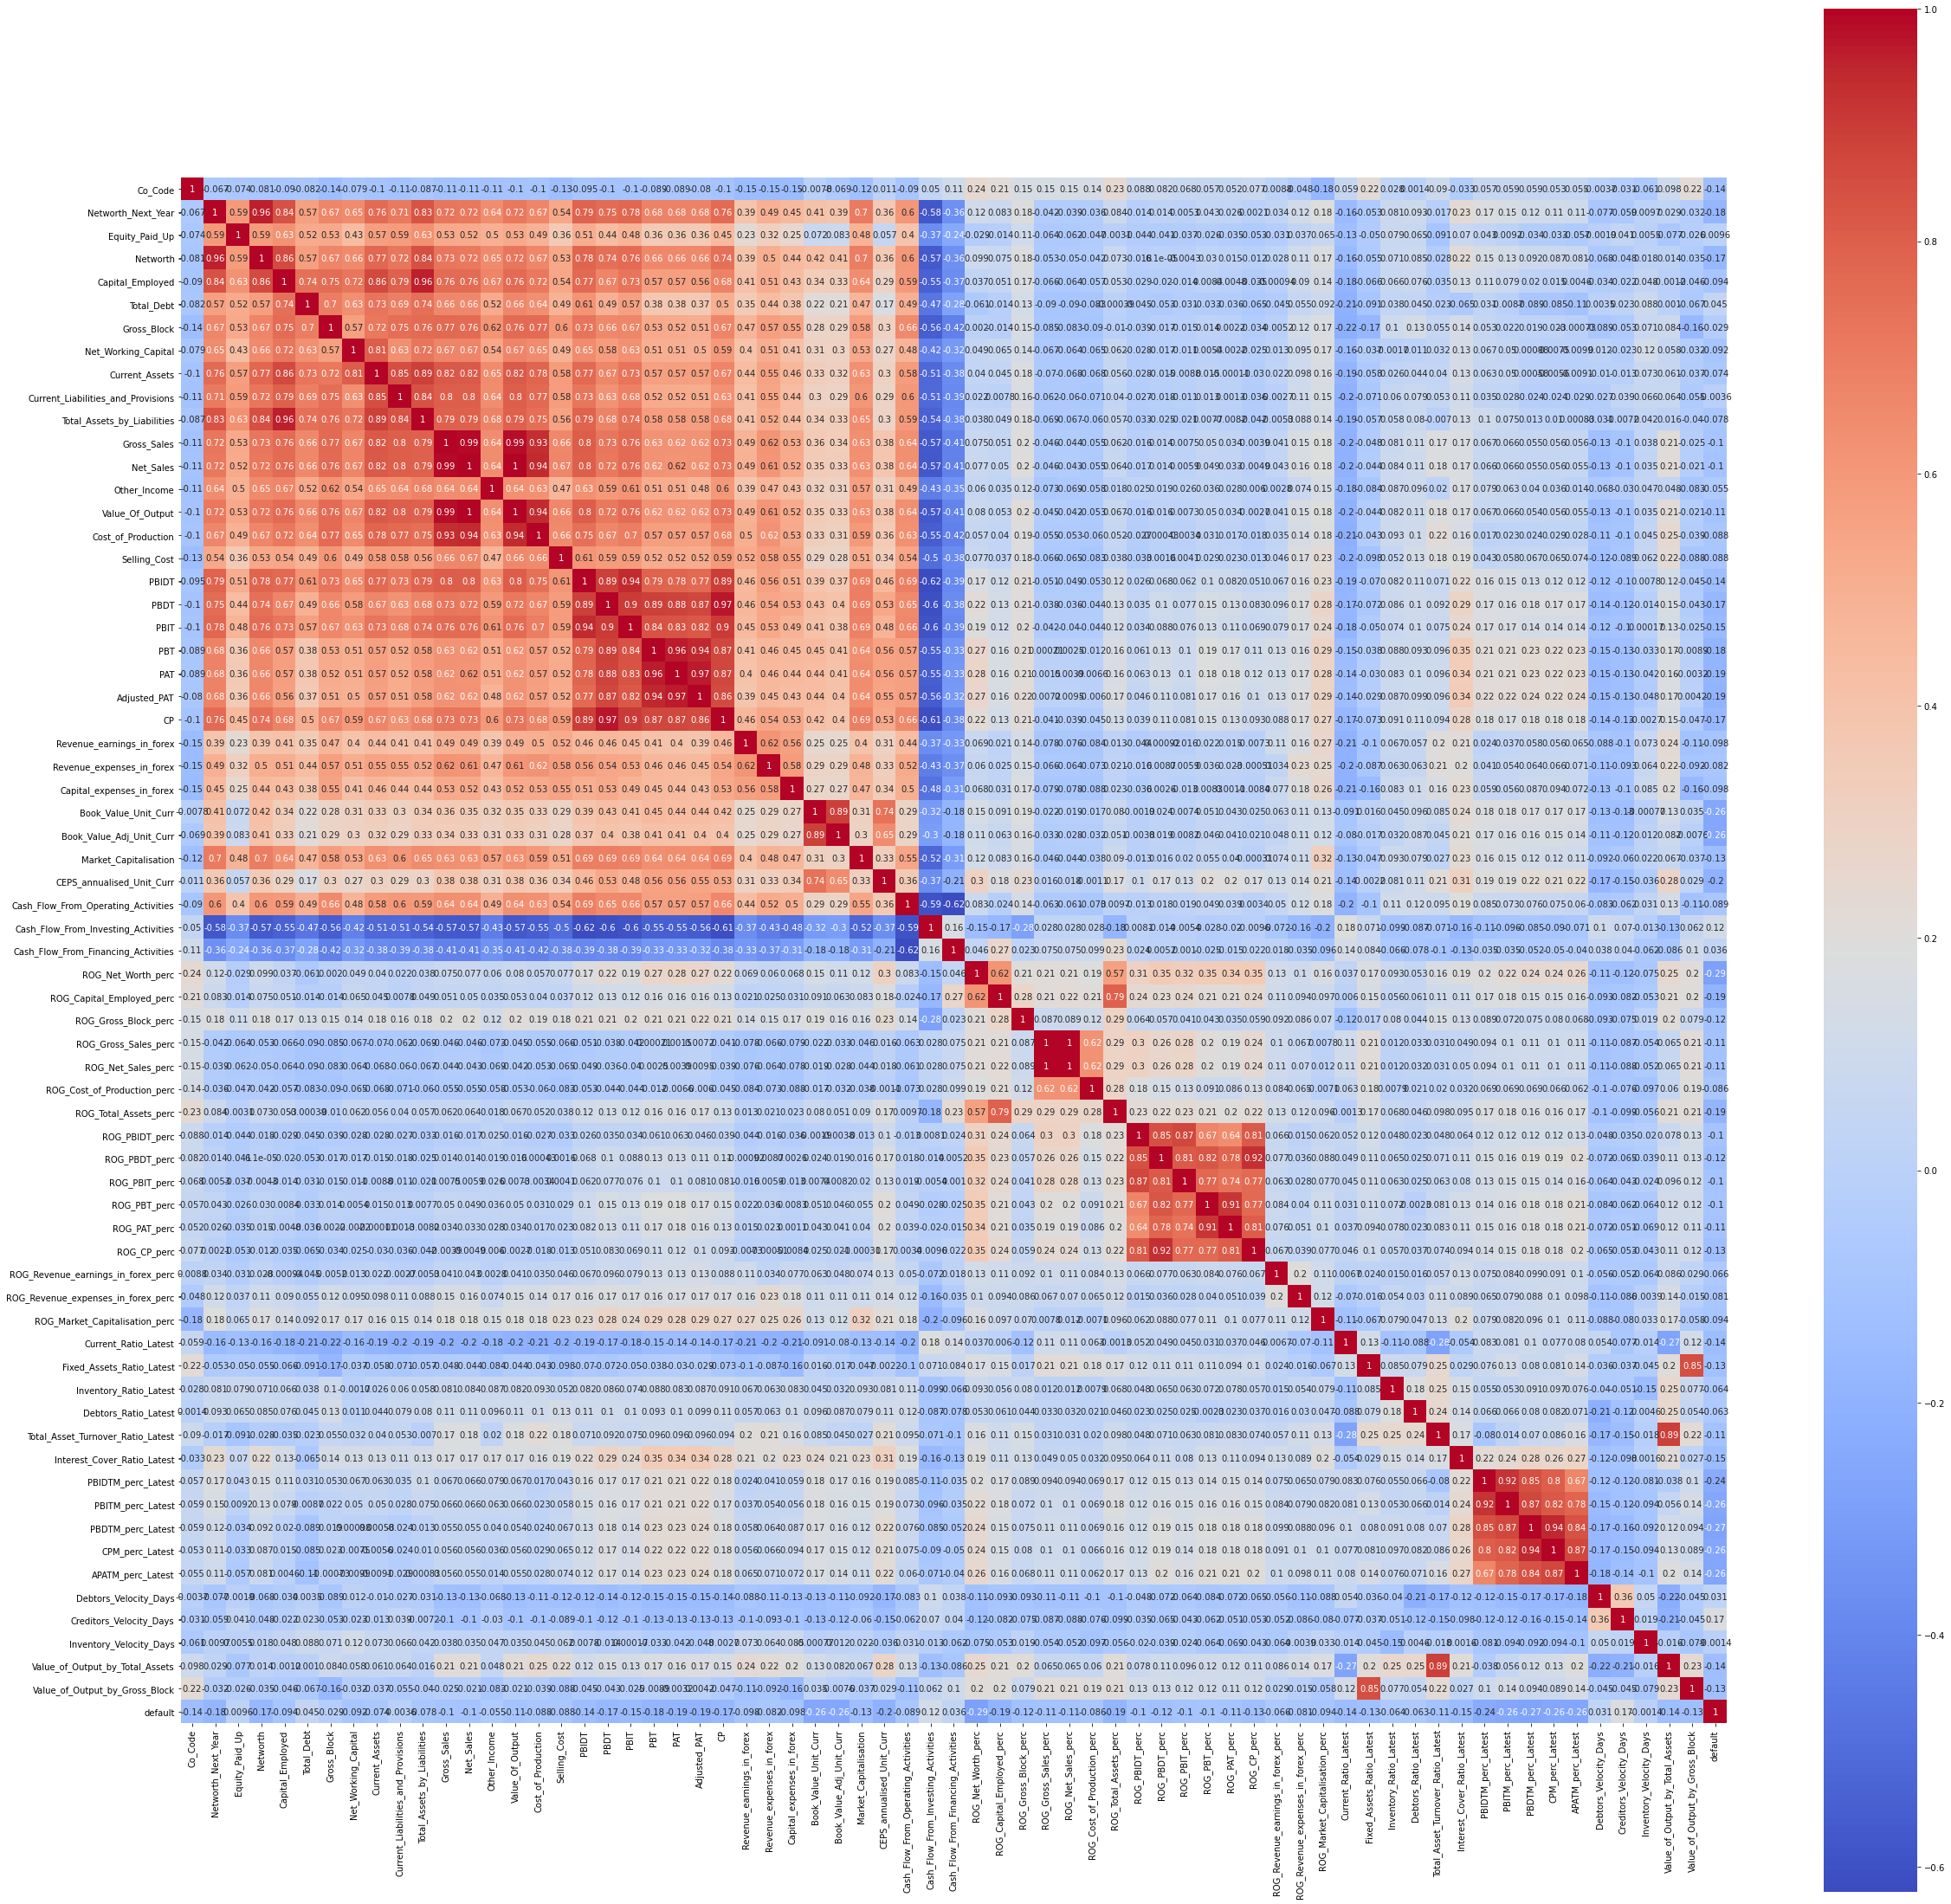

In [30]:
#calculate column correlations and make a seaborn heatmap.

plt.figure(figsize=(40,40))  
p=sns.heatmap(data.corr(), annot=True,cmap='coolwarm',square=True)

### Univariate and Bi-Variate Analysis

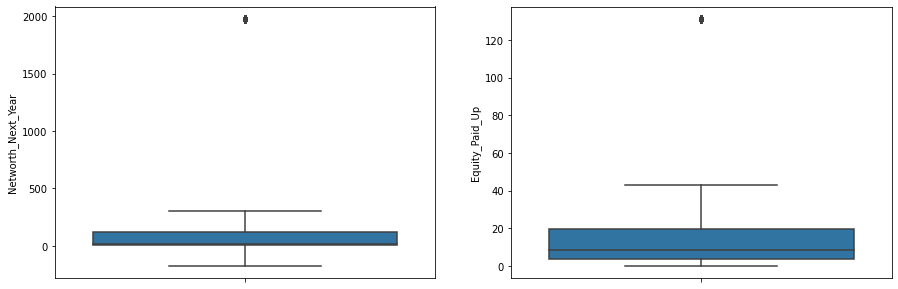

In [31]:
# Univariate Analysis 

plt.figure(figsize = (15, 5))
plt.subplot(1,2,1)
sns.boxplot(y = data['Networth_Next_Year'])

plt.subplot(1,2,2)
sns.boxplot(y = data['Equity_Paid_Up'])
plt.show()


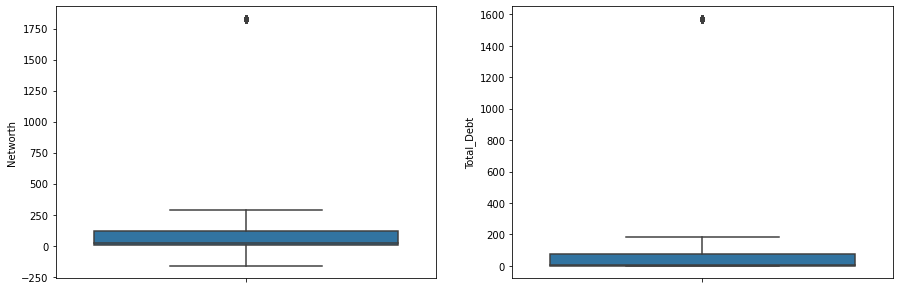

In [32]:
plt.figure(figsize = (15, 5))
plt.subplot(1,2,1)
sns.boxplot(y = data['Networth'])

plt.subplot(1,2,2)
sns.boxplot(y = data['Total_Debt'])
plt.show()

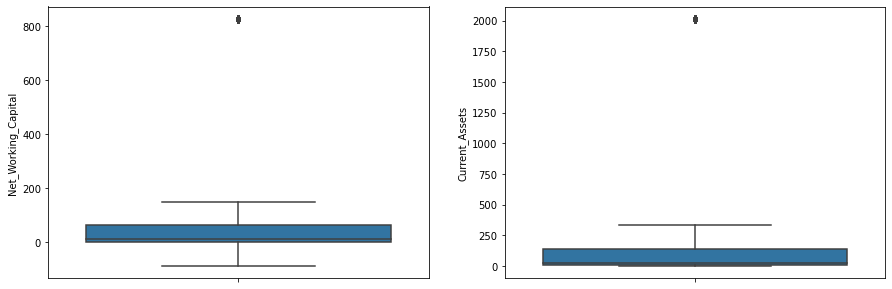

In [33]:
plt.figure(figsize = (15, 5))
plt.subplot(1,2,1)
sns.boxplot(y = data['Net_Working_Capital'])

plt.subplot(1,2,2)
sns.boxplot(y = data['Current_Assets'])
plt.show()

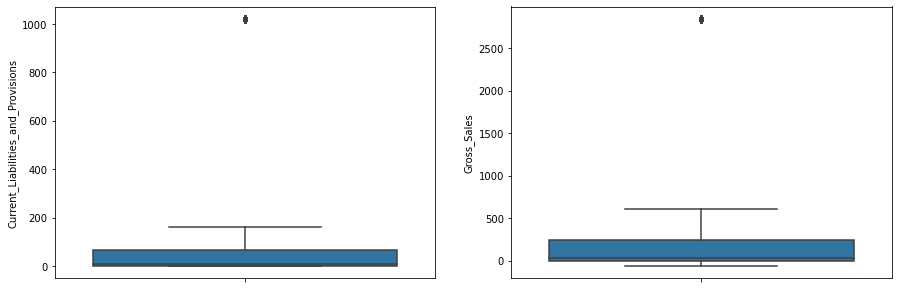

In [34]:
plt.figure(figsize = (15, 5))
plt.subplot(1,2,1)
sns.boxplot(y = data['Current_Liabilities_and_Provisions'])

plt.subplot(1,2,2)
sns.boxplot(y = data['Gross_Sales'])
plt.show()

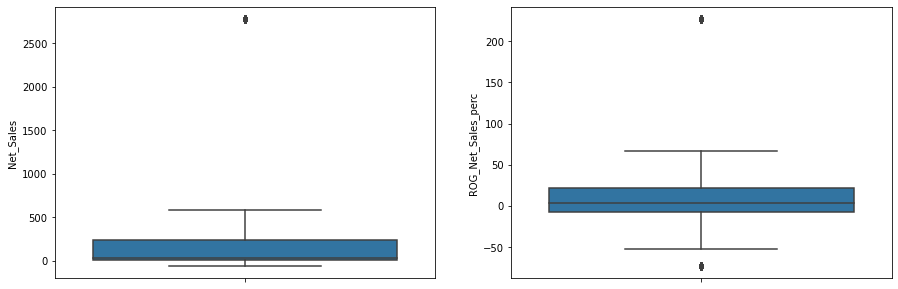

In [35]:
plt.figure(figsize = (15, 5))
plt.subplot(1,2,1)
sns.boxplot(y = data['Net_Sales'])

plt.subplot(1,2,2)
sns.boxplot(y = data['ROG_Net_Sales_perc'])
plt.show()

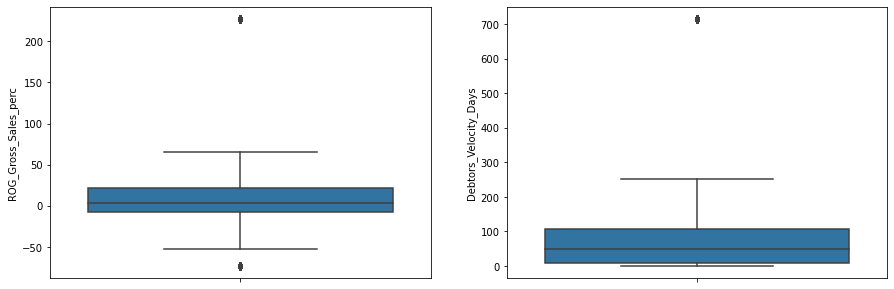

In [36]:
plt.figure(figsize = (15, 5))
plt.subplot(1,2,1)
sns.boxplot(y = data['ROG_Gross_Sales_perc'])

plt.subplot(1,2,2)
sns.boxplot(y = data['Debtors_Velocity_Days'])
plt.show()

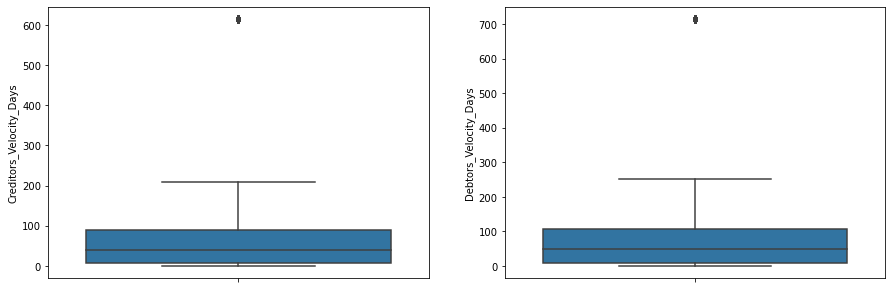

In [37]:
plt.figure(figsize = (15, 5))
plt.subplot(1,2,1)
sns.boxplot(y = data['Creditors_Velocity_Days'])

plt.subplot(1,2,2)
sns.boxplot(y = data['Debtors_Velocity_Days'])
plt.show()

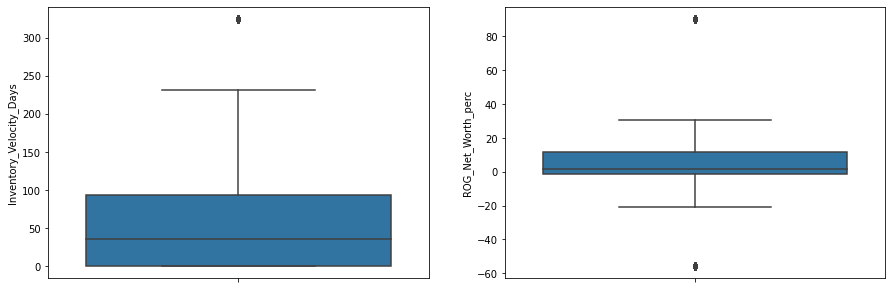

In [38]:
plt.figure(figsize = (15, 5))
plt.subplot(1,2,1)
sns.boxplot(y = data['Inventory_Velocity_Days'])

plt.subplot(1,2,2)
sns.boxplot(y = data['ROG_Net_Worth_perc'])
plt.show()

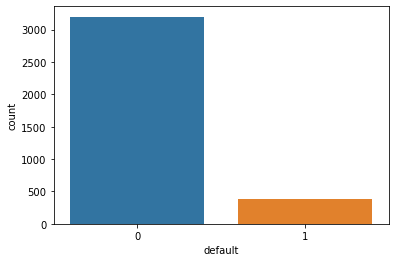

In [39]:
sns.countplot(data['default'])
plt.show()

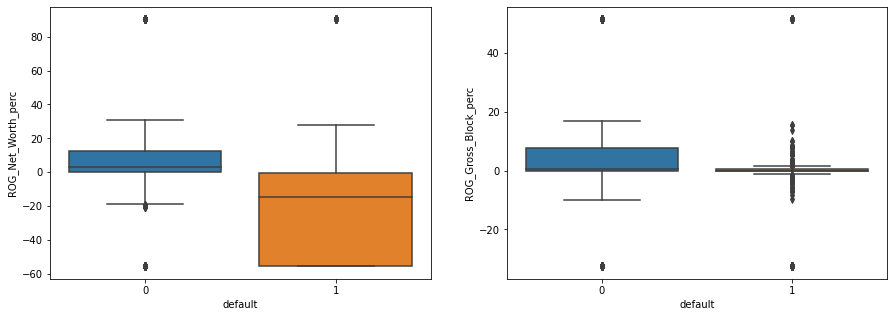

In [40]:
## Bi-variate Analysis of default variables with others

plt.figure(figsize = (15, 5))
plt.subplot(1,2,1)
sns.boxplot(data['default'], data['ROG_Net_Worth_perc'])

plt.subplot(1,2,2)
sns.boxplot(data['default'], data['ROG_Gross_Block_perc'])
plt.show()

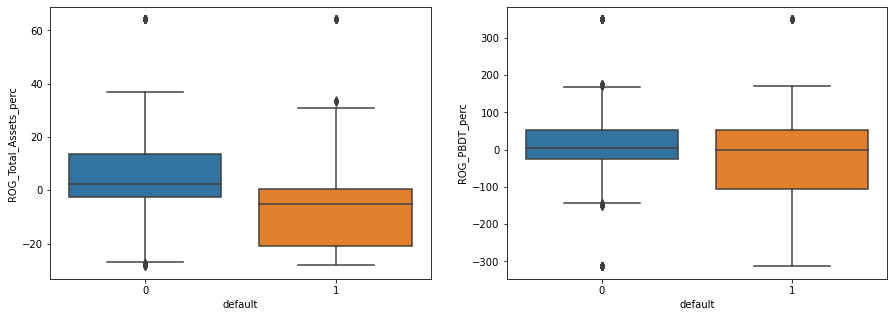

In [41]:
plt.figure(figsize = (15, 5))
plt.subplot(1,2,1)
sns.boxplot(data['default'], data['ROG_Total_Assets_perc'])

plt.subplot(1,2,2)
sns.boxplot(data['default'], data['ROG_PBDT_perc'])
plt.show()

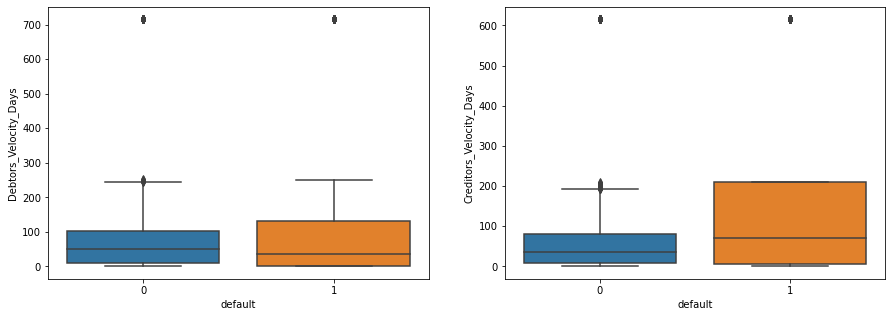

In [42]:
plt.figure(figsize = (15, 5))
plt.subplot(1,2,1)
sns.boxplot(data['default'], data['Debtors_Velocity_Days'])

plt.subplot(1,2,2)
sns.boxplot(data['default'], data['Creditors_Velocity_Days'])
plt.show()

<AxesSubplot:xlabel='default', ylabel='Inventory_Velocity_Days'>

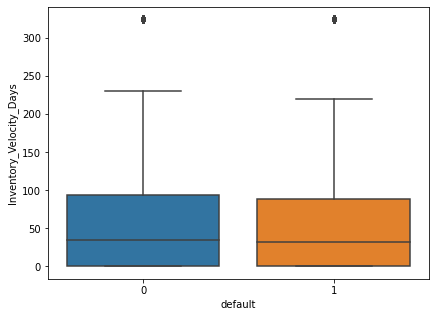

In [43]:
plt.figure(figsize = (15, 5))
plt.subplot(1,2,1)
sns.boxplot(data['default'], data['Inventory_Velocity_Days'])

### Splitting the train and Test Data

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X = data.drop('default', axis = 1)
y = data['default']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42, stratify = y)

In [47]:
print(X_train.shape)
print(X_test.shape)

(2402, 66)
(1184, 66)


In [48]:
print(y_train.value_counts(normalize = True).round(2))
print(' ')
print(y_test.value_counts(normalize = True).round(2))

0    0.89
1    0.11
Name: default, dtype: float64
 
0    0.89
1    0.11
Name: default, dtype: float64


### Building the Logistic Regression Model (using statsmodel library) on most important variables on Train Dataset

### The equation of the Logistic Regression by which we predict the corresponding probabilities and then go on predict a discrete target variable is
# y = $\frac{1}{1 + {e^{-z}}}$

### Note: z  = $\beta_0$ +${\sum_{i=1}^{n}(\beta_i  X_1)}$

In [53]:

import statsmodels.formula.api as SM

#### Creating logistic regression equation & storing it in f_1

model = SM.logit(formula=’Dependent Variable ~ Σ𝐼𝑛𝑑𝑒𝑝𝑒𝑛𝑑𝑒𝑛𝑡 𝑉𝑎𝑟𝑖𝑎𝑏𝑙𝑒𝑠 (𝑘)’
               data = ‘Data Frame containing the required values’).fit()

In [89]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=42, sampling_strategy = 0.75)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [90]:
Default_smote = pd.concat([X_res, y_res], axis = 1)

In [92]:
data.groupby('default').mean()

,Co_Code,Networth_Next_Year,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block,Net_Working_Capital,Current_Assets,Current_Liabilities_and_Provisions,...,PBIDTM_perc_Latest,PBITM_perc_Latest,PBDTM_perc_Latest,CPM_perc_Latest,APATM_perc_Latest,Debtors_Velocity_Days,Creditors_Velocity_Days,Inventory_Velocity_Days,Value_of_Output_by_Total_Assets,Value_of_Output_by_Gross_Block
default,,,,,,,,,,,,,,,,,,,,,
0,16903.624531,408.957194,24.860166,366.788078,703.771476,264.658433,252.840100,148.935649,380.859368,183.000785,...,13.109765,7.901448,5.195457,2.807649,-5.829715,124.299953,95.869215,67.896654,0.754435,10.374189
1,8404.708763,-21.988260,26.128686,4.654381,303.965226,348.316675,206.248505,62.922526,207.421340,178.662242,...,-8.715200,-20.585000,-25.427713,-24.855316,-44.621849,145.469716,194.793814,67.500000,0.429491,2.351153


In [93]:
Default_smote.groupby('default').mean()

,Co_Code,Networth_Next_Year,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block,Net_Working_Capital,Current_Assets,Current_Liabilities_and_Provisions,...,PBIDTM_perc_Latest,PBITM_perc_Latest,PBDTM_perc_Latest,CPM_perc_Latest,APATM_perc_Latest,Debtors_Velocity_Days,Creditors_Velocity_Days,Inventory_Velocity_Days,Value_of_Output_by_Total_Assets,Value_of_Output_by_Gross_Block
default,,,,,,,,,,,,,,,,,,,,,
0,17129.900904,407.399528,25.299685,365.900002,683.405735,260.319295,242.15595,141.843600,365.706834,179.227640,...,13.293664,7.925890,4.929037,2.435276,-6.461166,125.225661,97.004057,67.256259,0.738894,10.657862
1,7696.558639,-22.392826,22.994760,3.719400,322.210305,315.874042,182.64419,63.774003,216.461942,145.145275,...,-9.100281,-20.610092,-23.685351,-23.791867,-43.204051,143.334607,179.204603,64.604169,0.459315,2.624610


In [94]:
train = pd.concat([X_train, y_train], axis = 1)
train_smote = pd.concat([X_res, y_res], axis = 1)
test = pd.concat([X_test, y_test], axis = 1)

In [95]:
f_1 = 'default ~ Equity_Paid_Up + Networth + Capital_Employed + Total_Debt + Gross_Block + Net_Working_Capital + Current_Assets + Current_Liabilities_and_Provisions + Total_Assets_by_Liabilities + Gross_Sales + Net_Sales + Other_Income + Value_Of_Output + Cost_of_Production + Selling_Cost + PBIDT + PBDT + PBIT + PBT + PAT + Adjusted_PAT + CP + Revenue_earnings_in_forex + Revenue_expenses_in_forex + Capital_expenses_in_forex + Book_Value_Unit_Curr + Book_Value_Adj_Unit_Curr + Market_Capitalisation + CEPS_annualised_Unit_Curr + Cash_Flow_From_Operating_Activities + Cash_Flow_From_Investing_Activities + Cash_Flow_From_Financing_Activities + ROG_Net_Worth_perc + ROG_Capital_Employed_perc + ROG_Gross_Block_perc + ROG_Gross_Sales_perc + ROG_Net_Sales_perc + ROG_Cost_of_Production_perc + ROG_Total_Assets_perc + ROG_PBIDT_perc + ROG_PBDT_perc + ROG_PBIT_perc + ROG_PBT_perc + ROG_PAT_perc + ROG_CP_perc + ROG_Revenue_earnings_in_forex_perc + ROG_Revenue_expenses_in_forex_perc + ROG_Market_Capitalisation_perc + Current_Ratio_Latest + Fixed_Assets_Ratio_Latest  + Inventory_Ratio_Latest + Debtors_Ratio_Latest + Total_Asset_Turnover_Ratio_Latest + Interest_Cover_Ratio_Latest + PBIDTM_perc_Latest + PBITM_perc_Latest + PBDTM_perc_Latest + CPM_perc_Latest + APATM_perc_Latest + Debtors_Velocity_Days + Creditors_Velocity_Days + Inventory_Velocity_Days + Value_of_Output_by_Total_Assets + Value_of_Output_by_Gross_Block'

In [96]:
model_1 = SM.logit(formula = f_1, data= train).fit()

Optimization terminated successfully.
         Current function value: 0.119113
         Iterations 12


In [97]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2337
Method:                           MLE   Df Model:                           64
Date:                Wed, 08 Dec 2021   Pseudo R-squ.:                  0.6385
Time:                        01:12:57   Log-Likelihood:                -286.11
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                3.166e-170
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -0.5073      0.226     -2.247      0.025      -0.950      -0.065
Equity_Paid_Up                         -0.0091      0.005     -1.969      0.049      -0.018   -4.19e-05
Networth                               -0.0007      0.001     -0.974      0.330      -0.002       0.001
Capital_Employed                    -7.708e-05      0.001     -0.143      0.887      -0.001       0.001
Total_Debt                              0.0016      0.001      2.721      0.007       0.000       0.003
Gross_Block                            -0.0007      0.001     -0.950      0.342      -0.002       0.001
Net_Working_Capital                    -0.0004      0.001     -0.284      0.777      -0.003       0.002
Current_Assets                          0.0005      0.001      0.685      0.493      -0.001       0.002
Current_Liabilities_and_Provisions      0.0009      0.001      0.869      0.385      -0.001       0.003
Total_Assets_by_Liabilities             0.0002      0.000      0.478      0.632      -0.001       0.001
Gross_Sales                             0.0032      0.003      1.096      0.273      -0.003       0.009
Net_Sales                               0.0180      0.005      3.920      0.000       0.009       0.027
Other_Income                            0.0059      0.008      0.734      0.463      -0.010       0.022
Value_Of_Output                        -0.0211      0.004     -5.704      0.000      -0.028      -0.014
Cost_of_Production                     -0.0008      0.001     -0.946      0.344      -0.002       0.001
Selling_Cost                           -0.0078      0.012     -0.671      0.502      -0.031       0.015
PBIDT                                   0.0042      0.004      1.118      0.264      -0.003       0.011
PBDT                                    0.0051      0.008      0.616      0.538      -0.011       0.022
PBIT                                   -0.0047      0.005     -0.929      0.353      -0.015       0.005
PBT                                    -0.0251      0.009     -2.662      0.008      -0.044      -0.007
PAT                                     0.0206      0.010      2.120      0.034       0.002       0.040
Adjusted_PAT                            0.0076      0.009      0.841      0.400      -0.010       0.025
CP                                     -0.0047      0.010     -0.492      0.623      -0.024       0.014
Revenue_earnings_in_forex               0.0007      0.002      0.411      0.681      -0.003       0.004
Revenue_expenses_in_forex               0.0045      0.002      2.148      0.032       0.000       0.009
Capital_expenses_in_forex               0.0148      0.049      0.300      0.764      -0.082       0.111
Book_Value_Unit_Curr                   -0.0433      0.025     -1.748      0.080      -0.092       0.005
Book_Value_Adj_Unit_Curr               -0.1143      0.029     -3.901      0.000      -0.172      -0.057
Market_Capitalisa

In [98]:
## Validating the model on train set
y_pred_train = np.where(model_1.predict(train) > 0.5, 1, 0)

In [99]:
from sklearn.metrics import confusion_matrix, classification_report

In [86]:
from sklearn.model_selection import train_test_split

In [100]:
print(confusion_matrix(y_train, y_pred_train))

[[2137   20]
 [  74  171]]


In [101]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2157
           1       0.90      0.70      0.78       245

    accuracy                           0.96      2402
   macro avg       0.93      0.84      0.88      2402
weighted avg       0.96      0.96      0.96      2402



In [102]:
## Validating the model on test set

In [103]:
y_pred_test = np.where(model_1.predict(test) > 0.5, 1, 0)

In [104]:
print(confusion_matrix(y_test, y_pred_test))

[[1021   20]
 [  41  102]]


In [105]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1041
           1       0.84      0.71      0.77       143

    accuracy                           0.95      1184
   macro avg       0.90      0.85      0.87      1184
weighted avg       0.95      0.95      0.95      1184



In [106]:
#####Fitting the logistic regression model on balanced data

In [107]:
model_2 = SM.logit(formula = f_1, data= train_smote).fit()

Optimization terminated successfully.
         Current function value: 0.174833
         Iterations 13


In [108]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 3774
Model:                          Logit   Df Residuals:                     3709
Method:                           MLE   Df Model:                           64
Date:                Wed, 08 Dec 2021   Pseudo R-squ.:                  0.7440
Time:                        01:16:56   Log-Likelihood:                -659.82
converged:                       True   LL-Null:                       -2577.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                               1.3600      0.159      8.569      0.000       1.049       1.671
Equity_Paid_Up                         -0.0141      0.004     -3.824      0.000      -0.021      -0.007
Networth                               -0.0024      0.001     -4.226      0.000      -0.004      -0.001
Capital_Employed                        0.0003      0.000      0.597      0.550      -0.001       0.001
Total_Debt                              0.0022      0.001      4.129      0.000       0.001       0.003
Gross_Block                            -0.0017      0.001     -2.649      0.008      -0.003      -0.000
Net_Working_Capital                     0.0035      0.001      3.368      0.001       0.001       0.006
Current_Assets                         -0.0010      0.001     -1.693      0.090      -0.002       0.000
Current_Liabilities_and_Provisions      0.0048      0.001      5.291      0.000       0.003       0.007
Total_Assets_by_Liabilities             0.0004      0.000      0.987      0.323      -0.000       0.001
Gross_Sales                             0.0056      0.002      2.681      0.007       0.001       0.010
Net_Sales                               0.0183      0.003      5.978      0.000       0.012       0.024
Other_Income                            0.0095      0.006      1.530      0.126      -0.003       0.022
Value_Of_Output                        -0.0251      0.002    -10.524      0.000      -0.030      -0.020
Cost_of_Production                  -9.527e-06      0.001     -0.015      0.988      -0.001       0.001
Selling_Cost                            0.0036      0.009      0.413      0.680      -0.014       0.021
PBIDT                                   0.0045      0.003      1.344      0.179      -0.002       0.011
PBDT                                    0.0007      0.007      0.097      0.923      -0.013       0.014
PBIT                                    0.0045      0.005      1.005      0.315      -0.004       0.013
PBT                                    -0.0354      0.007     -4.749      0.000      -0.050      -0.021
PAT                                     0.0312      0.009      3.296      0.001       0.013       0.050
Adjusted_PAT                            0.0009      0.007      0.133      0.894      -0.012       0.014
CP                                     -0.0183      0.007     -2.539      0.011      -0.033      -0.004
Revenue_earnings_in_forex              -0.0020      0.001     -1.482      0.138      -0.005       0.001
Revenue_expenses_in_forex               0.0080      0.002      4.590      0.000       0.005       0.011
Capital_expenses_in_forex               0.0207      0.036      0.576      0.565      -0.050       0.091
Book_Value_Unit_Curr                   -0.1478      0.023     -6.318      0.000      -0.194      -0.102
Book_Value_Adj_Unit_Curr               -0.0353      0.023     -1.515      0.130      -0.081       0.010
Market_Capitalisa

In [109]:
## Validating on resampled train set

In [110]:
y_pred_train_smote = np.where(model_2.predict(train_smote) > 0.5, 1, 0)

In [111]:
print(confusion_matrix(y_res, y_pred_train_smote))

[[2012  145]
 [  86 1531]]


In [112]:
print(classification_report(y_res, y_pred_train_smote))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95      2157
           1       0.91      0.95      0.93      1617

    accuracy                           0.94      3774
   macro avg       0.94      0.94      0.94      3774
weighted avg       0.94      0.94      0.94      3774



In [113]:
## Validating on test set

In [114]:
y_pred_test_smote = np.where(model_2.predict(test) > 0.5, 1, 0)

In [115]:
print(confusion_matrix(y_test, y_pred_test_smote))

[[957  84]
 [ 14 129]]


In [116]:
print(classification_report(y_test, y_pred_test_smote))

              precision    recall  f1-score   support

           0       0.99      0.92      0.95      1041
           1       0.61      0.90      0.72       143

    accuracy                           0.92      1184
   macro avg       0.80      0.91      0.84      1184
weighted avg       0.94      0.92      0.92      1184



### The End